In [1]:
import pandas as pd
import numpy as np

# 数据导入与预处理

In [2]:
# Load the file to inspect its content
file_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_pre.csv'
df = pd.read_csv(file_path)

# df = pd.read_csv(r'D:\xjtufiles\3ee\DGA_data_pre.csv', index_col = 0)
df = df.iloc[:-1,:]
# df

df['h2'] = pd.to_numeric(df['h2'],errors='coerce')
df['ch4'] = pd.to_numeric(df['ch4'],errors='coerce')
df['c2h6'] = pd.to_numeric(df['c2h6'],errors='coerce')
df['c2h4'] = pd.to_numeric(df['c2h4'],errors='coerce')
df['c2h2'] = pd.to_numeric(df['c2h2'],errors='coerce')
df['act'] = pd.to_numeric(df['act'],errors='coerce')

df = df.reset_index(drop=True) # 重置索引

In [3]:
print(df['act'].nunique(dropna=True)) # 显示类别数量

6


## 原始数据可视化

C:\Users\11094\AppData\Local\Temp\ipykernel_26696\3121626782.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
C:\Users\11094\AppData\Local\Temp\ipykernel_26696\3121626782.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致


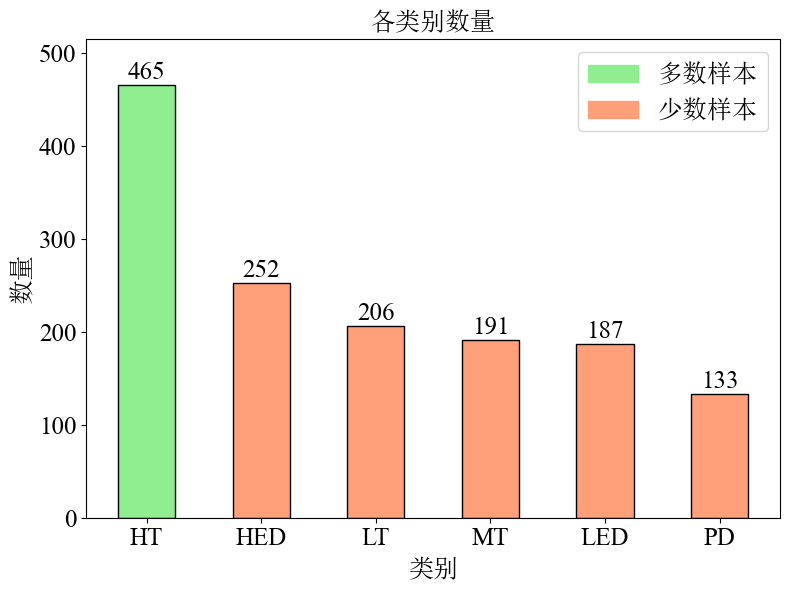

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_counts = df['act'].value_counts()  # 计算每个类别的数量

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_counts.index = act_counts.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon'] # 设定每个柱子的颜色

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_counts.index, act_counts.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别数量', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('数量', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示样本数量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontproperties=font_en)

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_counts.values) + 50) # 设置纵轴范围，+5是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

C:\Users\11094\AppData\Local\Temp\ipykernel_26696\2313638102.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
C:\Users\11094\AppData\Local\Temp\ipykernel_26696\2313638102.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')


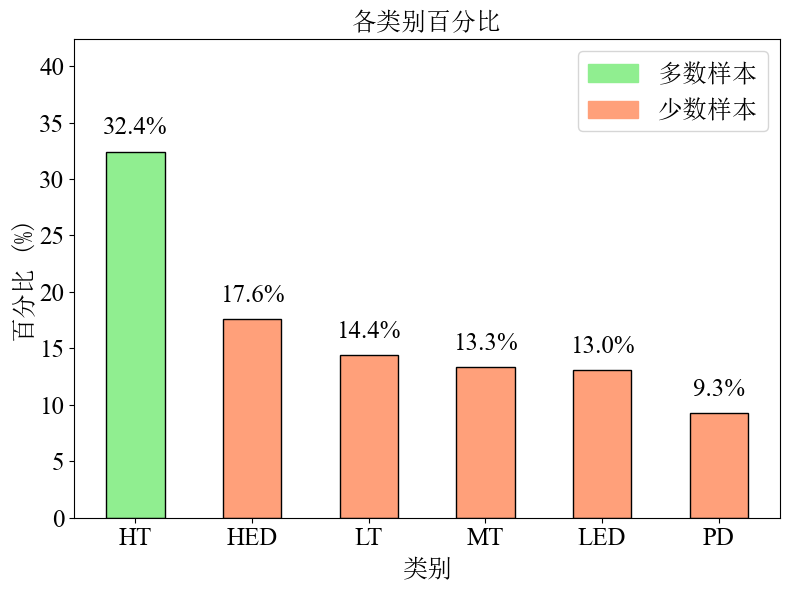

In [5]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_percentages = df['act'].value_counts(normalize=True) * 100  # 计算每个类别的百分比

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_percentages.index = act_percentages.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon']

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_percentages.index, act_percentages.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别百分比', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('百分比 (%)', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示百分比
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontproperties=font_en)  # 显示百分比，保留一位小数

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_percentages.values) + 10)  # 设置纵轴范围，+10是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

In [6]:
X = df.iloc[:, :5]
y = df.iloc[:, -1]

,h2,ch4,c2h6,c2h4,c2h2,ch4/h2,c2h6/ch4,c2h4/c2h6,c2h2/c2h4
0,294.00,27.40,5.60,52.60,338.000,0.093197,0.204380,9.392855,6.425855
1,200.83,59.45,41.00,40.48,150.840,0.296022,0.689655,0.987317,3.726284
2,71.60,20.20,2.70,34.60,44.200,0.282123,0.133663,12.814810,1.277457
3,29.30,24.90,7.30,11.40,7.500,0.849829,0.293173,1.561644,0.657895
4,1170.00,255.00,18.00,312.00,325.000,0.217949,0.070588,17.333332,1.041667
...,...,...,...,...,...,...,...,...,...
1429,197.00,12.00,6.60,15.00,0.001,0.060914,0.550000,2.272727,0.000067
1430,980.00,73.00,58.00,12.00,0.000,0.074490,0.794521,0.206897,0.000000
1431,44.63,35.36,7.59,1.68,0.000,0.792292,0.214649,0.221344,0.000000
1432,743.00,74.00,39.00,6.00,0.000,0.099596,0.527027,0.153846,0.000000


In [29]:
from sklearn.model_selection import train_test_split

# 假设 X 和 y 是你的特征和目标变量
X_trinomial_train, X_trinomial_test, y_trinomial_train, y_trinomial_test = train_test_split(X_trinomial, y, test_size=0.2, random_state=42) #test_size=0.2 代表测试集占百分之20

# 未添加新特征

## 划分训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

## KNeighborsClassifier

In [8]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[21  4  2  0  1  0]
 [ 2 40  0  0  1  0]
 [ 3  1 13  1  0  1]
 [ 1  1  1 16  1  1]
 [ 0  4  0  2 16  0]
 [ 1  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        28
           2       0.80      0.93      0.86        43
           3       0.81      0.68      0.74        19
           4       0.84      0.76      0.80        21
           5       0.84      0.73      0.78        22
           6       0.83      0.91      0.87        11

    accuracy                           0.81       144
   macro avg       0.81      0.79      0.80       144
weighted avg       0.81      0.81      0.80       144

Accuracy: 0.8055555555555556


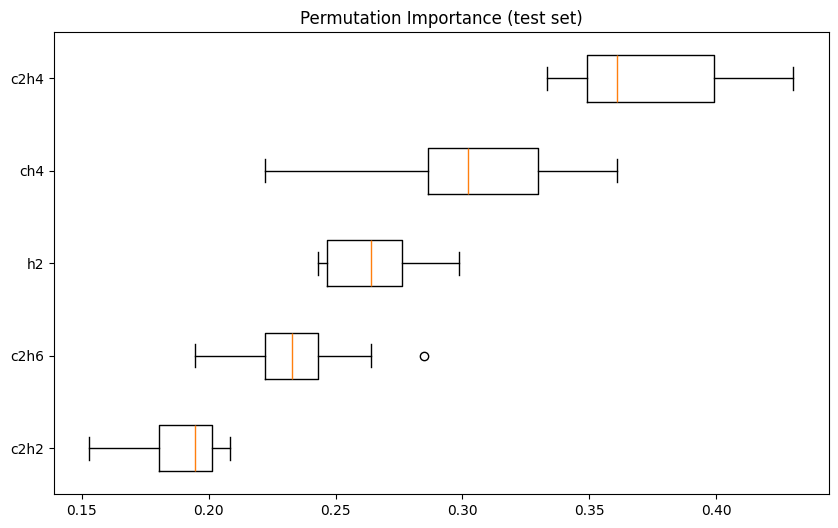

c2h2: 0.1896
c2h6: 0.2333
h2: 0.2660
ch4: 0.3028
c2h4: 0.3715


In [10]:
# 导入permutation_importance
from sklearn.inspection import permutation_importance
result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

## 标准化数据KNN

通常情况下，训练数据和测试数据的标准化应该使用相同的均值和标准差。因此，标准化测试数据时应使用 scaler.transform(X_test) 而不是 scaler.fit_transform(X_test)。这样可以确保训练数据和测试数据使用相同的标准化参数。

Accuracy: 80.56%


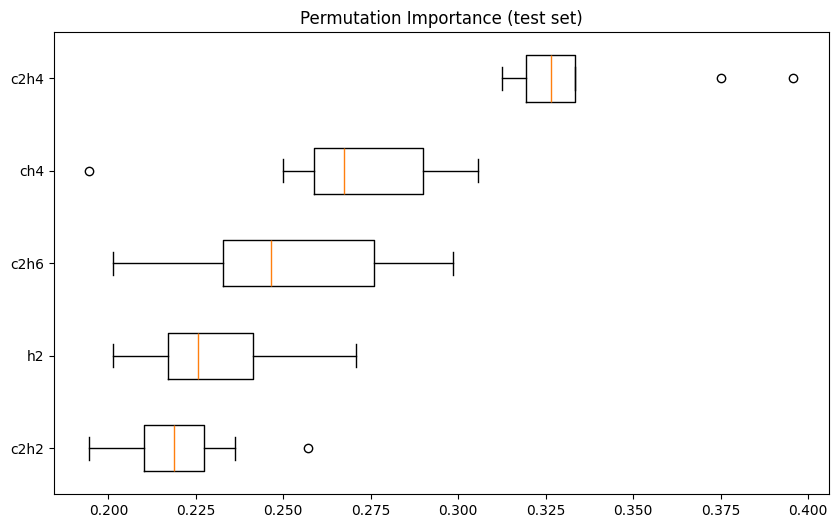

c2h2: 0.2208
h2: 0.2292
c2h6: 0.2507
ch4: 0.2674
c2h4: 0.3354


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ts = scaler.fit_transform(X_train)
X_tes = scaler.transform(X_test)
classifier.fit(X_ts,y_train)

y_tes = classifier.predict(X_tes)

accuracy = accuracy_score(y_tes,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 置换重要性
result = permutation_importance(classifier, X_tes, y_test, n_repeats=10, random_state=42)

# 排序特征重要性
sorted_idx = result.importances_mean.argsort()

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

## XGBClassifier

In [12]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=8,
 scale_pos_weight=2,
 seed=27)


### [1,6]->[0,5]

In [13]:
y_train = y_train - 1
y_test = y_test - 1

In [14]:
xgb1.fit(X_train,y_train)

preds = xgb1.predict(X_test) # 输出类别
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,y_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [21:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 77.08%


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,preds)
print("Accuracy:",result2)

Confusion Matrix:
[[20  3  5  0  0  0]
 [ 2 41  0  0  0  0]
 [ 7  2  9  1  0  0]
 [ 0  1  0 17  1  2]
 [ 1  4  0  3 14  0]
 [ 0  1  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.79      0.95      0.86        43
           2       0.64      0.47      0.55        19
           3       0.81      0.81      0.81        21
           4       0.93      0.64      0.76        22
           5       0.83      0.91      0.87        11

    accuracy                           0.77       144
   macro avg       0.78      0.75      0.76       144
weighted avg       0.77      0.77      0.76       144

Accuracy: 0.7708333333333334


### 特征重要性（Feature Importance）

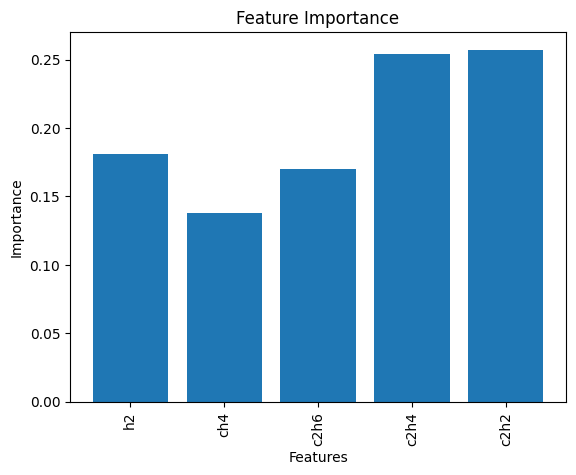

h2: 0.1812
ch4: 0.1375
c2h6: 0.1703
c2h4: 0.2538
c2h2: 0.2572


In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

### 置换重要性（Permutation Importance）

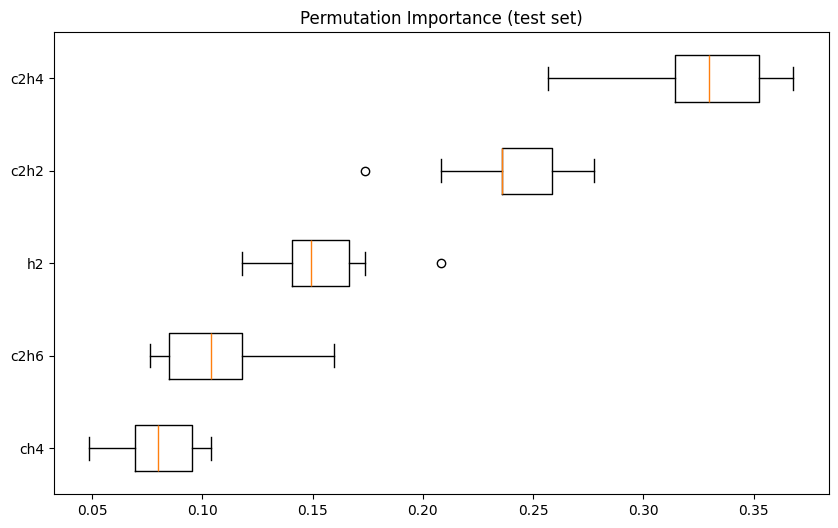

ch4: 0.0806
c2h6: 0.1083
h2: 0.1549
c2h2: 0.2375
c2h4: 0.3257


In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb1, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

### SHAP 值（SHapley Additive exPlanations）

## 随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经定义



clf.fit(X_train, y_train)

y_t = clf.predict(X_test)
accuracy = accuracy_score(y_t, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 获取特征重要性
importance = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical')  # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [ ]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    y_t = clf.predict(X_test)
    accuracy = accuracy_score(y_t,y_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy * 100.0))
    
# 通过循环，我们可以看到当 max_depth=13 时，准确率最高
# 该循环是为了找到最佳的 max_depth 参数值，即模型的最佳深度
# 模型深度指的是树的最大深度，即树的最大层数  

# 添加新特征

## 构建新的特征列

In [19]:
import pandas as pd

def create_interaction_features_with_names(X):
    """
    使用列名创建列之间的差和比值。

    参数：
    X (pd.DataFrame): 包含特征的 DataFrame。

    返回：
    pd.DataFrame: 包含原始特征以及差和比值的新 DataFrame。
    """

    col_names = X.columns  # 获取列名列表
    num_cols = len(col_names)  # 获取列数

    # 计算差值
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            col_name_i = col_names[i]
            col_name_j = col_names[j]
            X[f'diff_{col_name_i}_{col_name_j}'] = X.iloc[:, i] - X.iloc[:, j]

    # 计算比值 (注意处理除以零的情况)
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                col_name_i = col_names[i]
                col_name_j = col_names[j]
                X[f'ratio_{col_name_i}_{col_name_j}'] = X.iloc[:, i] / (X.iloc[:, j] + 1e-9)  # 添加一个小的常数以避免除以零

    return X

# 假设 X 是你的 DataFrame
# X = ...  # 你的 DataFrame

X_new = create_interaction_features_with_names(X.copy()) #使用copy()，避免原始数据被修改

print(X_new)

           h2     ch4   c2h6    c2h4     c2h2  diff_h2_ch4  diff_h2_c2h6  \
0      294.00   27.40   5.60   52.60  338.000       266.60        288.40   
1      200.83   59.45  41.00   40.48  150.840       141.38        159.83   
2       71.60   20.20   2.70   34.60   44.200        51.40         68.90   
3       29.30   24.90   7.30   11.40    7.500         4.40         22.00   
4     1170.00  255.00  18.00  312.00  325.000       915.00       1152.00   
...       ...     ...    ...     ...      ...          ...           ...   
1429   197.00   12.00   6.60   15.00    0.001       185.00        190.40   
1430   980.00   73.00  58.00   12.00    0.000       907.00        922.00   
1431    44.63   35.36   7.59    1.68    0.000         9.27         37.04   
1432   743.00   74.00  39.00    6.00    0.000       669.00        704.00   
1433   106.00    4.00   2.00    1.00    0.001       102.00        104.00   

      diff_h2_c2h4  diff_h2_c2h2  diff_ch4_c2h6  ...  ratio_c2h6_c2h4  \
0           24

## 划分训练集和测试集

In [20]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size = 0.10, random_state=42)

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_new_train, y_new_train)
y_new_pred = classifier.predict(X_new_test)

In [23]:
# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_new_test, y_new_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_new_test, y_new_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_new_test,y_new_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[20  3  4  0  1  0]
 [ 2 36  0  2  3  0]
 [ 3  2 13  1  0  0]
 [ 0  1  1 15  2  2]
 [ 0  7  1  1 13  0]
 [ 0  0  2  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.71      0.75        28
           2       0.73      0.84      0.78        43
           3       0.62      0.68      0.65        19
           4       0.79      0.71      0.75        21
           5       0.68      0.59      0.63        22
           6       0.82      0.82      0.82        11

    accuracy                           0.74       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.74      0.74      0.73       144

Accuracy: 0.7361111111111112


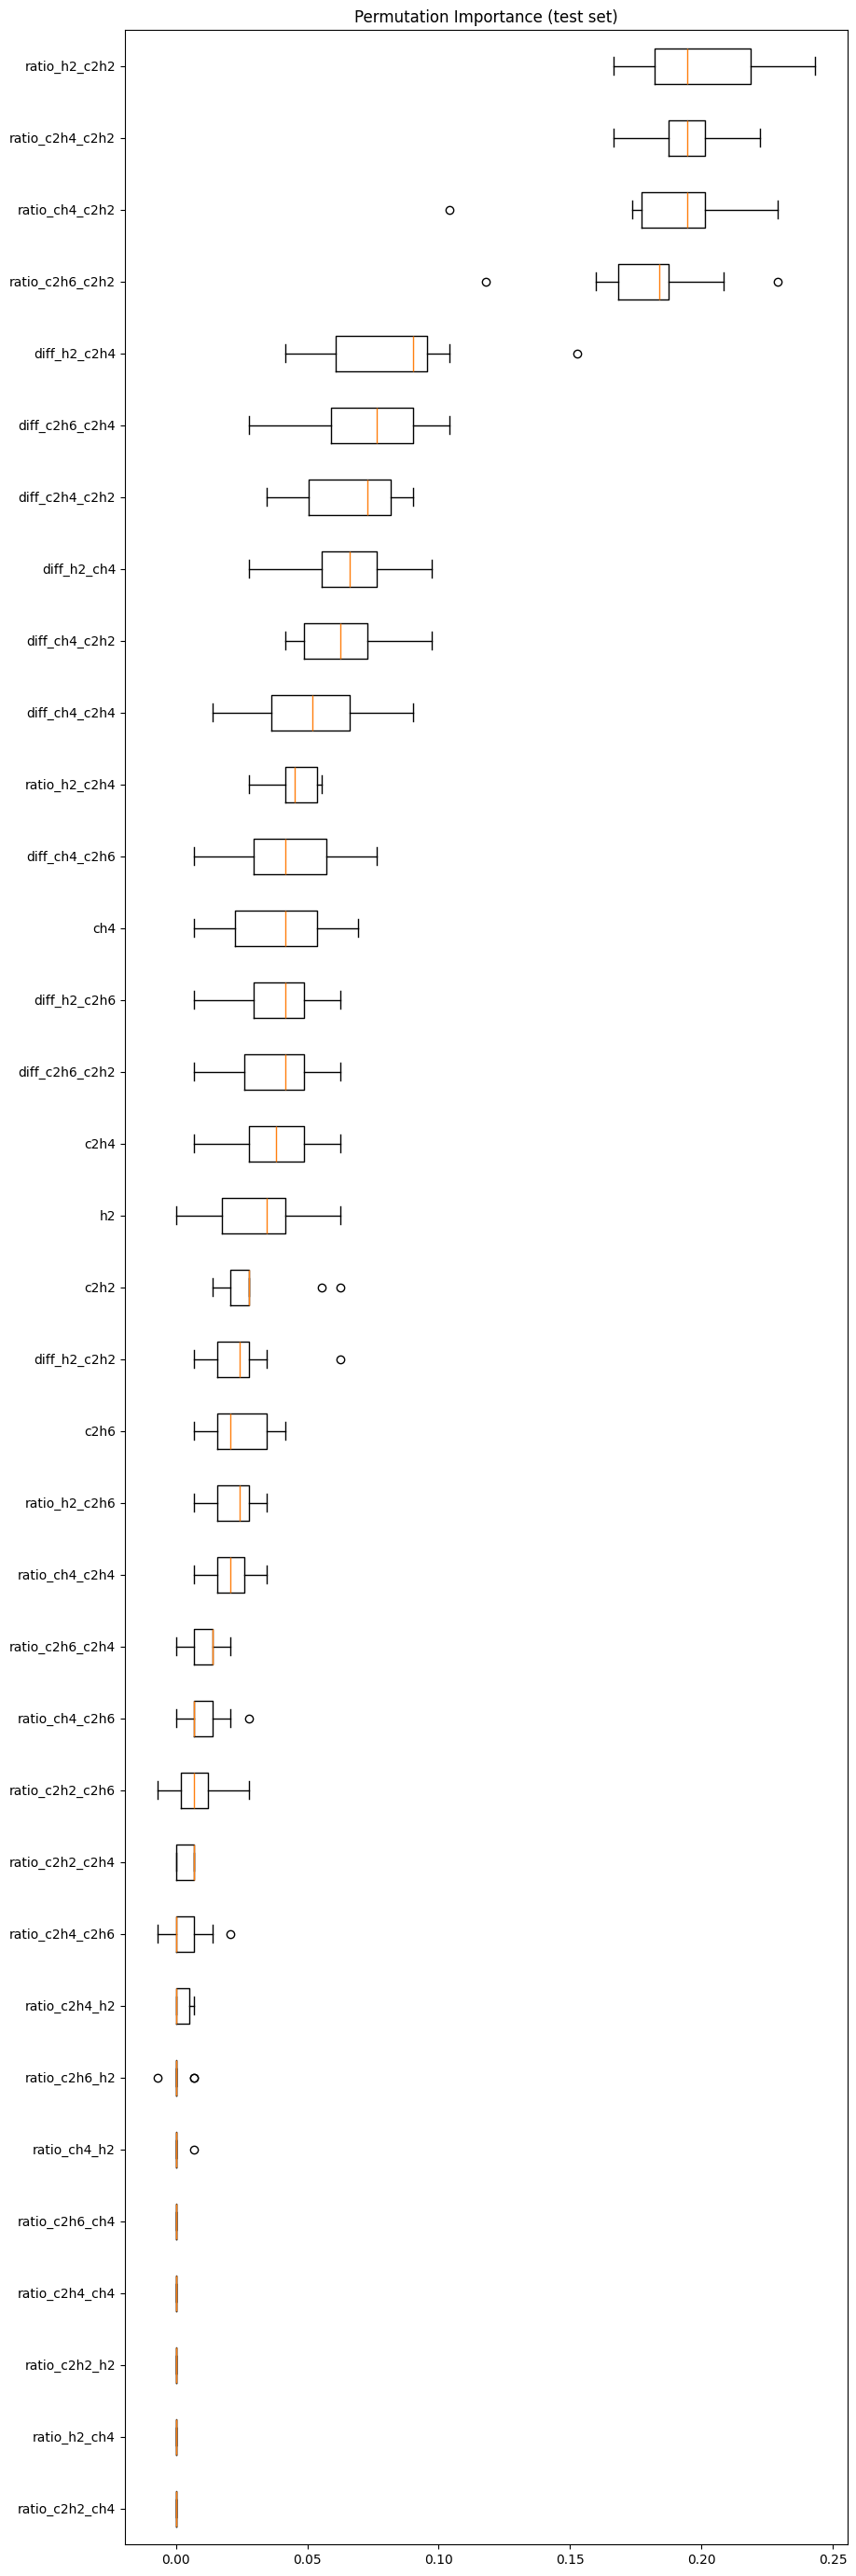

ratio_c2h2_ch4: 0.0000
ratio_h2_ch4: 0.0000
ratio_c2h2_h2: 0.0000
ratio_c2h4_ch4: 0.0000
ratio_c2h6_ch4: 0.0000
ratio_ch4_h2: 0.0007
ratio_c2h6_h2: 0.0007
ratio_c2h4_h2: 0.0021
ratio_c2h4_c2h6: 0.0042
ratio_c2h2_c2h4: 0.0042
ratio_c2h2_c2h6: 0.0076
ratio_ch4_c2h6: 0.0104
ratio_c2h6_c2h4: 0.0118
ratio_ch4_c2h4: 0.0208
ratio_h2_c2h6: 0.0222
c2h6: 0.0236
diff_h2_c2h2: 0.0250
c2h2: 0.0299
h2: 0.0306
c2h4: 0.0382
diff_c2h6_c2h2: 0.0389
diff_h2_c2h6: 0.0389
ch4: 0.0396
diff_ch4_c2h6: 0.0417
ratio_h2_c2h4: 0.0451
diff_ch4_c2h4: 0.0507
diff_ch4_c2h2: 0.0625
diff_h2_ch4: 0.0653
diff_c2h4_c2h2: 0.0674
diff_c2h6_c2h4: 0.0722
diff_h2_c2h4: 0.0840
ratio_c2h6_c2h2: 0.1799
ratio_ch4_c2h2: 0.1882
ratio_c2h4_c2h2: 0.1938
ratio_h2_c2h2: 0.2000


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_new_train, y_new_train)

result_new = permutation_importance(classifier, X_new_test, y_new_test, n_repeats=10, random_state=42)

sorted_idx_new = result_new.importances_mean.argsort()

plt.figure(figsize=(10, 35))
plt.boxplot(result_new.importances[sorted_idx_new].T, vert=False, labels=X_new_test.columns[sorted_idx_new])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx_new:
    print(f"{X_new_train.columns[i]}: {result_new.importances_mean[i]:.4f}")

## 标准化数据KNN
通常情况下，训练数据和测试数据的标准化应该使用相同的均值和标准差。因此，标准化测试数据时应使用 scaler.transform(X_test) 而不是 scaler.fit_transform(X_test)。这样可以确保训练数据和测试数据使用相同的标准化参数。


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经定义

leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p = [1, 2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)


In [ ]:
clf.fit(X_new_train,y_new_train)

y_new_t = clf.predict(X_new_test)
accuracy_new = accuracy_score(y_new_t,y_new_test)
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))


# 获取最佳模型
best_knn_new = clf.best_estimator_

# 计算置换重要性
result_new = permutation_importance(best_knn_new, X_new_test, y_new_test, n_repeats=10, random_state=42)

# 可视化特征重要性
sorted_idx_new = result_new.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result_new.importances[sorted_idx_new].T, vert=False, labels=X_new_test.columns[sorted_idx_new])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx_new:
    print(f"{X_new_test.columns[i]}: {result_new.importances_mean[i]:.4f}")

## XGBClassifier

In [86]:
y_new_train = y_new_train - 1
y_new_test = y_new_test - 1

In [87]:
xgb1.fit(X_new_train,y_new_train)

preds_new = xgb1.predict(X_new_test) # 输出类别

from sklearn.metrics import accuracy_score
accuracy_new = accuracy_score(preds_new,y_new_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

/root/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 84.03%


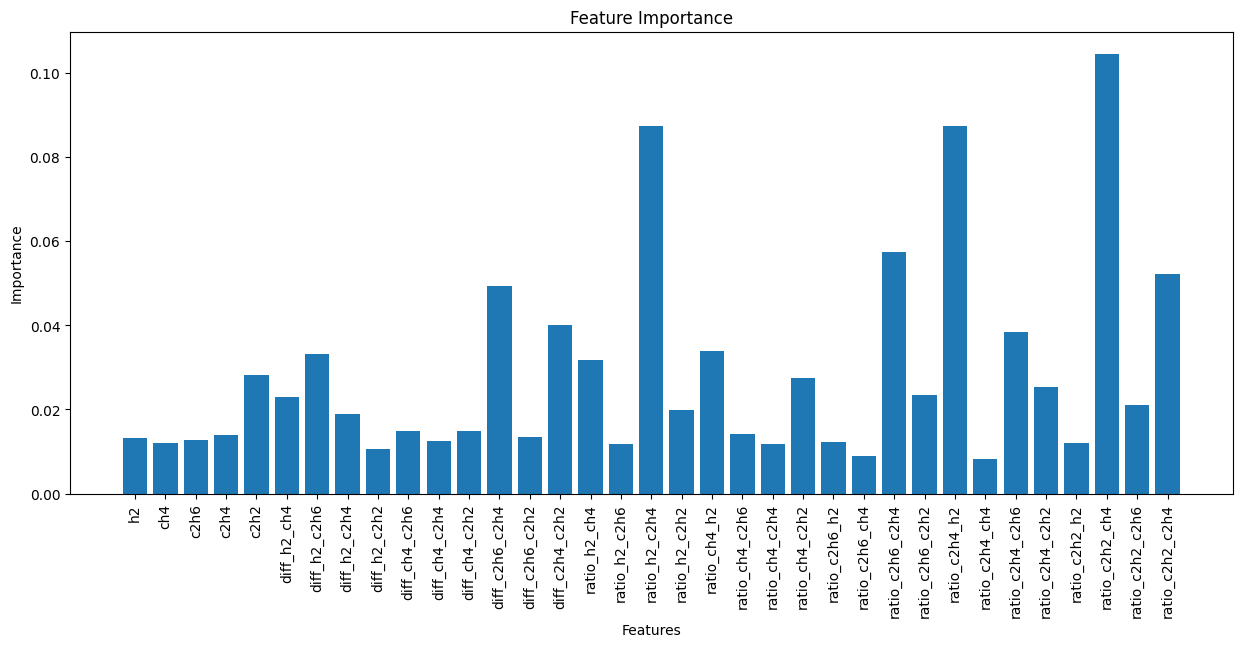

h2: 0.0133
ch4: 0.0121
c2h6: 0.0127
c2h4: 0.0139
c2h2: 0.0281
diff_h2_ch4: 0.0229
diff_h2_c2h6: 0.0332
diff_h2_c2h4: 0.0188
diff_h2_c2h2: 0.0105
diff_ch4_c2h6: 0.0149
diff_ch4_c2h4: 0.0126
diff_ch4_c2h2: 0.0149
diff_c2h6_c2h4: 0.0494
diff_c2h6_c2h2: 0.0134
diff_c2h4_c2h2: 0.0400
ratio_h2_ch4: 0.0317
ratio_h2_c2h6: 0.0118
ratio_h2_c2h4: 0.0873
ratio_h2_c2h2: 0.0198
ratio_ch4_h2: 0.0339
ratio_ch4_c2h6: 0.0141
ratio_ch4_c2h4: 0.0119
ratio_ch4_c2h2: 0.0276
ratio_c2h6_h2: 0.0124
ratio_c2h6_ch4: 0.0090
ratio_c2h6_c2h4: 0.0574
ratio_c2h6_c2h2: 0.0234
ratio_c2h4_h2: 0.0873
ratio_c2h4_ch4: 0.0083
ratio_c2h4_c2h6: 0.0384
ratio_c2h4_c2h2: 0.0253
ratio_c2h2_h2: 0.0120
ratio_c2h2_ch4: 0.1046
ratio_c2h2_c2h6: 0.0210
ratio_c2h2_c2h4: 0.0523


In [91]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
# 设定图片尺寸
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_new_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_new_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_new = confusion_matrix(y_new_test, preds_new)
print("Confusion Matrix:")
print(result_new)
result1_new = classification_report(y_new_test, preds_new)
print("Classification Report:",)
print (result1_new)
result2_new = accuracy_score(y_new_test,preds_new)
print("Accuracy:",result2_new)

Confusion Matrix:
[[22  1  4  0  1  0]
 [ 2 41  0  0  0  0]
 [ 4  1 12  1  0  1]
 [ 0  1  0 19  1  0]
 [ 0  3  1  2 16  0]
 [ 0  0  0  0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.87      0.95      0.91        43
           2       0.71      0.63      0.67        19
           3       0.86      0.90      0.88        21
           4       0.89      0.73      0.80        22
           5       0.92      1.00      0.96        11

    accuracy                           0.84       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.84      0.84      0.84       144

Accuracy: 0.8402777777777778


## 随机森林方法

In [ ]:
clf = RandomForestClassifier(max_depth=13, random_state=42)
clf.fit(X_new_train, y_new_train)

y_new_t = clf.predict(X_new_test)

In [ ]:
accuracy_new = accuracy_score(y_new_t,y_new_test)
print("Accuracy: %.2f%%" % (accuracy_new * 100.0))

# 获取特征重要性
importance_new = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance_new)), importance_new)
plt.xticks(range(len(importance_new)), X_new_train.columns, rotation='vertical')  # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_new_train.columns):
    print(f"{feature}: {importance_new[i]:.4f}")

Accuracy: 84.72%


In [46]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_new_train, y_new_train)
    y_new_t = clf.predict(X_new_test)
    accuracy_new = accuracy_score(y_new_t,y_new_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy_new * 100.0))

Depth: 1, Accuracy: 45.14%
Depth: 2, Accuracy: 57.64%
Depth: 3, Accuracy: 73.61%
Depth: 4, Accuracy: 79.86%
Depth: 5, Accuracy: 81.94%
Depth: 6, Accuracy: 83.33%
Depth: 7, Accuracy: 84.72%
Depth: 8, Accuracy: 84.72%
Depth: 9, Accuracy: 84.72%
Depth: 10, Accuracy: 84.72%
Depth: 11, Accuracy: 84.72%
Depth: 12, Accuracy: 84.03%
Depth: 13, Accuracy: 86.11%
Depth: 14, Accuracy: 85.42%
Depth: 15, Accuracy: 85.42%
Depth: 16, Accuracy: 84.72%
Depth: 17, Accuracy: 85.42%
Depth: 18, Accuracy: 84.72%
Depth: 19, Accuracy: 84.72%


# 三比值法

In [ ]:
# 示例：使用SMOTE + XGBoost
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

X_trinomial = X.copy()

# 生成三比值特征 h2	ch4	c2h6 c2h4 c2h2
X_trinomial['ch4/h2'] = X['ch4'] / (X['h2'] + 1e-6)  # 比值1为 CH4 与 H2 的比值
X_trinomial['c2h6/ch4'] = X['c2h6'] / (X['ch4'] + 1e-6) # 比值2为 C2H6 与 CH4 的比值
X_trinomial['c2h4/c2h6'] = X['c2h4'] / (X['c2h6'] + 1e-6) # 比值3为 C2H4 与 C2H6 的比值
X_trinomial['c2h2/c2h4'] = X['c2h2'] / (X['c2h4'] + 1e-6) # 比值4为 C2H2 与 C2H4 的比值

X_trinomial

## KNN

In [ ]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_trinomial_train, y_trinomial_train)
y_trinomial_test = classifier.predict(X_trinomial_test)

# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_trinomial = confusion_matrix(y_trinomial_test, y_trinomial_pred)
print("Confusion Matrix:")
print(result_trinomial)
result1_trinomial = classification_report(y_trinomial_test, y_trinomial_pred)
print("Classification Report:",)
print (result1_trinomial)
result2_trinomial = accuracy_score(y_trinomial_test,y_trinomial_pred)
print("Accuracy:",result2_trinomial)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_trinomial_train, y_trinomial_train)

result_trinomial = permutation_importance(classifier, X_trinomial_test, y_trinomial_test, n_repeats=10, random_state=42)

sorted_idx_trinomial = result_trinomial.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx_trinomial:
    print(f"{X_trinomial_train.columns[i]}: {result_trinomial.importances_mean[i]:.4f}")

## 标准化处理KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trinomial_ts = scaler.fit_transform(X_trinomial_train)
X_trinomial_tes = scaler.transform(X_trinomial_test)
X_trinomial_tes

In [ ]:

classifier.fit(X_trinomial_ts,y_trinomial_train)

y_trinomial_tes = classifier.predict(X_trinomial_tes)

accuracy_trinomial = accuracy_score(y_trinomial_tes,y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy_trinomial * 100.0))

# 置换重要性
result_trinomial = permutation_importance(classifier, X_trinomial_tes, y_trinomial_test, n_repeats=10, random_state=42)

# 排序特征重要性
sorted_idx_trinomial = result_trinomial.importances_mean.argsort()

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx_trinomial:
    print(f"{X_trinomial_test.columns[i]}: {result_trinomial.importances_mean[i]:.4f}")